# Kaufman Efficiency Ratio

__Definition:__ It is the result of dividing the net change in price movement during n-periods by the sum of all bar-to-bar price changes during the same n-periods.

__Uses:__ Used to filter out noises in the price movement.

## Equation

$$
\Large KER = \frac{Close_{n} - Close_{1}}{\sum(Close_{n} - Close_{n-1})}
$$

**WHERE**

**KER** = Kaufman Efficiency Ratio

**n** = time series window

**Close** = Closing price

## Step-by-step Procedure

1. Import the modules needed
2. Set the variables
3. Get the stock data
4. Get the change in value in a new column
5. Get the direction for the price
6. Get the volatility
7. Get the Kaufman Efficiency Ratio
8. Plot the result

## 1. Import the modules needed

In [11]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt

## 2. Set the variables

In [6]:
START_DATE = '2020-1-1'
END_DATE = '2021-1-1'
TICKER = 'SPY'
N = 10

## 3. Get the stock data

In [3]:
df = pdr.DataReader(TICKER, 'yahoo', start=START_DATE, end=END_DATE)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,369.029999,367.450012,368.079987,369.000000,26457900.0,365.425323
2020-12-28,372.589996,371.070007,371.739990,372.170013,39000400.0,368.564636
2020-12-29,374.000000,370.829987,373.809998,371.459991,53680500.0,367.861481
2020-12-30,373.100006,371.570007,372.339996,371.989990,49455300.0,368.386353
2020-12-31,374.660004,371.230011,371.779999,373.880005,78520700.0,370.258057


## 4. Get the change in value in a new column
(current price minus the previous price)

In [5]:
df['Changes'] = df['Close'].diff().abs()
df['Changes'].tail()

Date
2020-12-24    1.429993
2020-12-28    3.170013
2020-12-29    0.710022
2020-12-30    0.529999
2020-12-31    1.890015
Name: Changes, dtype: float64

## 5. Get the direction for the price
(current_price minus past_n_price)

In [7]:
df['direction'] = df['Close'].diff(N).abs()
df['direction'].tail()

Date
2020-12-24    2.269989
2020-12-28    5.870026
2020-12-29    6.799988
2020-12-30    2.399994
2020-12-31    3.709991
Name: direction, dtype: float64

## 6. Get the volatility
(sum up the changes within the N period)

In [8]:
df['volatility'] = df['Changes'].rolling(N).sum()
df['volatility'].tail()

Date
2020-12-24    16.410004
2020-12-28    19.149994
2020-12-29    18.220032
2020-12-30    13.820038
2020-12-31    15.130035
Name: volatility, dtype: float64

## 7. Get the Kaufman Efficiency Ratio
(direction divided by volatility)

In [9]:
df['ker'] = df['direction'] / df['volatility']
df['ker'].tail()

Date
2020-12-24    0.138330
2020-12-28    0.306529
2020-12-29    0.373215
2020-12-30    0.173660
2020-12-31    0.245207
Name: ker, dtype: float64

## 8. Plot the result

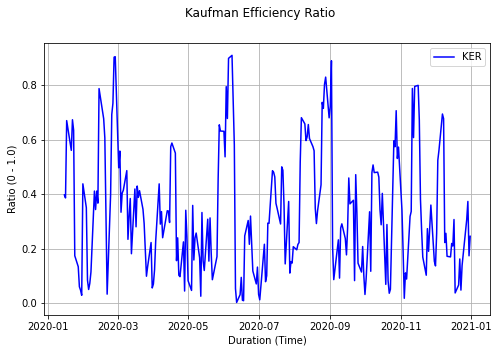

In [10]:
fig1 = plt.figure()
fig1.set_size_inches(8,5)
fig1.suptitle('Kaufman Efficiency Ratio')
plt.plot(df['ker'],color='blue',label='KER')
plt.grid(True,which='both')
plt.legend()
plt.ylabel('Ratio (0 - 1.0)')
plt.xlabel('Duration (Time)')
plt.show()

## Resources

1. https://kaabar-sofien.medium.com/how-to-use-the-efficiency-ratio-in-trend-following-trading-558f7d14555
2. https://www.marketvolume.com/technicalanalysis/efficiencyratio.asp